# Antes de implementar una regresión lineal, veremos la relación que existe entre dos variables. 

## Correlación Lineal 

La correlación lineal y la regresión lineal simple son métodos estadísticos que estudian la relación lineal existente entre dos variables. Antes de profundizar en cada uno de ellos, conviene destacar algunas diferencias:

* La correlación cuantifica como de relacionadas están dos variables, mientras que la regresión lineal consiste en generar una ecuación (modelo) que, basándose en la relación existente entre ambas variables, permita predecir el valor de una a partir de la otra.

* El cálculo de la correlación entre dos variables es independiente del orden o asignación de cada variable a X e Y, mide únicamente la relación entre ambas sin considerar dependencias. En el caso de la regresión lineal, el modelo varía según qué variable se considere dependiente de la otra (lo cual no implica causa-efecto).

* A nivel experimental, la correlación se suele emplear cuando ninguna de las variables se ha controlado, simplemente se han medido ambas y se desea saber si están relacionadas. En el caso de estudios de regresión lineal, es más común que una de las variables se controle (tiempo, concentración de reactivo, temperatura…) y se mida la otra.

* Por norma general, los estudios de correlación lineal preceden a la generación de modelos de regresión lineal. Primero se analiza si ambas variables están correlacionadas y, en caso de estarlo, se procede a generar el modelo de regresión.

Me centraré en especificar en que consiste la correlación de Pearson: 

Es in índice que mide el grado de covariación entre distintas variables relacionadas linealmente, esto significa que puede haber variables relacionadas fuertemente, pero no de forma lineal. Este valor oscila entre 0 y 1 osea $$0\leq r_{xy} \leq 1$$

Decimos que la correlación entre dos variables X e Y es perfecta positiva cuando exactamente en la medida que aumenta una de ellas aumenta la otra, se dice también que la relación es perfecta negativa cuando exactamente en la medida que
aumenta una variable disminuye la otra.

## Significación del coeficiente de correlación 

Cuando se ha obtenido dicho valor, vale la pena saber si las variables X e Y están relacionadas en realidad o tan solo
presentan dicha relación como consecuencia del azar. En otras palabras, nos preguntamos por la significación de dicho coeficiente de correlación.

Un coeficiente de correlación se dice que es significativo si se puede afirmar, con una cierta probabilidad, que es diferente de cero. Más estrictamente, en términos estadísticos, preguntarse por la significación de un cierto coeficiente de correlación no es otra cosa que preguntarse por la probabilidad de que tal coeficiente proceda de una población cuyo valor sea de cero. A este respecto, como siempre, tendremos dos hipótesis posibles:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [96]:
datos = pd.read_csv("Datasets/Salary_Data.csv")

In [3]:
#estudiaremos la relacion lineal que puede existir entre dos variables. ¿Que tan relacionadas estan?. 
datos["Corrn"] = (datos["YearsExperience"] - np.mean(datos["YearsExperience"])) * (datos["Salary"] - np.mean(datos["Salary"]))

In [4]:
datos.head()

,YearsExperience,Salary,Corrn
0,1.1,39343.0,154460.800000
1,1.3,46205.0,119589.306667
2,1.5,37731.0,145943.893333
3,2.0,43525.0,107610.440000
4,2.2,39891.0,112428.693333


In [5]:
datos["corr1"] = (datos["YearsExperience"] - np.mean(datos["YearsExperience"])) **2
datos["corr2"] = (datos["Salary"] - np.mean(datos["Salary"])) **2


In [6]:
datos.head(3)

,YearsExperience,Salary,Corrn,corr1,corr2
0,1.1,39343.0,154460.800000,17.752178,1.343956e+09
1,1.3,46205.0,119589.306667,16.106844,8.879208e+08
2,1.5,37731.0,145943.893333,14.541511,1.464746e+09


In [7]:
correlacion_pearson = sum(datos["Corrn"]) / np.sqrt(sum(datos["corr1"]) * sum(datos["corr2"]))

In [8]:
correlacion_pearson

0.9782416184887598

In [9]:
def coeficiente_correlacion(df, Var1, Var2) : 
    df["Corrn"] = (df[Var1] - np.mean(df[Var1])) * (df[Var2] - np.mean(df[Var2]))
    df["corr1"] = (df[Var1] - np.mean(df[Var1])) **2
    df["corr2"] = (df[Var2] - np.mean(df[Var2])) **2
    corr_pearson = sum(df["Corrn"]) / np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_pearson

In [10]:
coeficiente_correlacion(datos,"Salary", "YearsExperience")

0.9782416184887598

In [11]:
prueba = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/ads/Advertising.csv")

In [12]:
columnas = prueba.columns.values

In [13]:
correlacion_perfecta_positiva = {}
correlacion_positiva = {}
correlacion_negativa = {}
correlacion_perfecta_negativa = {}
for x in columnas:
    for y in columnas:
        
        if coeficiente_correlacion(prueba,x,y) == 1:
            correlacion_perfecta_positiva["{},{}".format(x,y)] = coeficiente_correlacion(prueba,x,y)
            
        elif coeficiente_correlacion(prueba,x,y)>0 and coeficiente_correlacion(prueba,x,y)<1:
            correlacion_positiva["{},{}".format(x,y)] = coeficiente_correlacion(prueba,x,y)
            
        elif coeficiente_correlacion(prueba,x,y)<0 and coeficiente_correlacion(prueba,x,y)>-1:
            correlacion_negativa["{},{}".format(x,y)] = coeficiente_correlacion(prueba,x,y)
            
        elif coeficiente_correlacion(prueba,x,y) == -1:
            correlacion_perfecta_negativa["{},{}".format(x,y)] = coeficiente_correlacion(prueba,x,y)
            
print("Correlación perfecta positiva.")
print("-------------------------------")
for key in correlacion_perfecta_positiva:
    print(key, ":", correlacion_perfecta_positiva[key])
print("-----------------------------------")
    
print("Correlación positiva.")
print("-----------------------")
for key in correlacion_positiva:
    print(key, ":", correlacion_positiva[key])
print("--------------------------")
    
print("Correlación negativa.")
print("-----------------------")
for key in correlacion_negativa:
    print(key, ":", correlacion_negativa[key])
print("---------------------------")
    
print("Correlación perfecta negativa.")
print("----------------------------------")
for key in correlacion_perfecta_negativa:
    print(key, ":", correlacion_perfecta_negativa[key])
print("-------------------------------------")
    

Correlación perfecta positiva.
-------------------------------
TV,TV : 1.0
Radio,Radio : 1.0
Newspaper,Newspaper : 1.0
Sales,Sales : 1.0
-----------------------------------
Correlación positiva.
-----------------------
TV,Radio : 0.05480866446583009
TV,Newspaper : 0.056647874965056993
TV,Sales : 0.782224424861606
Radio,TV : 0.05480866446583009
Radio,Newspaper : 0.3541037507611752
Radio,Sales : 0.5762225745710553
Newspaper,TV : 0.056647874965056993
Newspaper,Radio : 0.3541037507611752
Newspaper,Sales : 0.22829902637616525
Sales,TV : 0.782224424861606
Sales,Radio : 0.5762225745710553
Sales,Newspaper : 0.22829902637616525
--------------------------
Correlación negativa.
-----------------------
---------------------------
Correlación perfecta negativa.
----------------------------------
-------------------------------------


In [14]:
datos.head(5)

,YearsExperience,Salary,Corrn,corr1,corr2
0,1.1,39343.0,154460.800000,1.343956e+09,17.752178
1,1.3,46205.0,119589.306667,8.879208e+08,16.106844
2,1.5,37731.0,145943.893333,1.464746e+09,14.541511
3,2.0,43525.0,107610.440000,1.054820e+09,10.978178
4,2.2,39891.0,112428.693333,1.304077e+09,9.692844


In [41]:
datos.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [97]:
X = datos.iloc[:, :-1].values
Y = datos.iloc[:, 1].values

In [98]:
#dividir el dataset en conjunto de entrenamiento y en conjunto de testing 
from sklearn.model_selection import train_test_split
train, test = train_test_split(datos, test_size=1/3)

In [99]:
len(train)

20

In [100]:
len(datos)

30

In [101]:
Y_train = pd.DataFrame(train["Salary"])
X_train = pd.DataFrame(train["YearsExperience"])

# Regresión Lineal 



In [121]:
from sklearn.linear_model import LinearRegression

In [102]:
#modelizacion. 
regression = LinearRegression()
regression.fit(X_train, Y_train) #entrenamos un algoritmo. 
#de esta manera la maquina ha aprendido la correlacion ente las variables, el regresor habra deducido cual es la mejor 
#ordenada en el origen y en la pendiente por le metodo de minimos cuadrados.

LinearRegression()

In [103]:
#ahora vamos a predecir el conjunto de Test, dado el entrenamiento que ya hubo. 
Y_test = pd.DataFrame(test["Salary"])
X_test = pd.DataFrame(test["YearsExperience"])

In [104]:
Y_pred = regression.predict(X_test)

In [24]:
vs = Y_test

In [25]:
#comparativa respecto al salario real y al predicho. 
vs["Valor_Predicho"] = Y_pred

In [26]:
vs

,Salary,Valor_Predicho
20,91738.0,89624.999013
6,60150.0,54361.536337
9,57189.0,60857.437356
2,37731.0,40441.748439
26,116969.0,114680.617230
25,105582.0,110040.687931
3,43525.0,45081.677738
28,122391.0,122104.504109
23,113812.0,102616.801051
15,67938.0,71993.267675


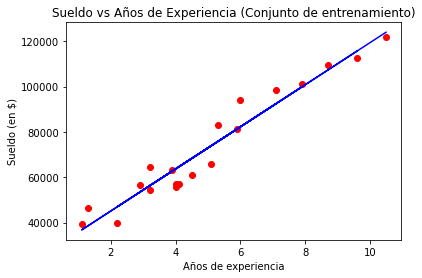

In [27]:
#graficamente 
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_train,regression.predict(X_train), color = "blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de entrenamiento)")
plt.xlabel("Años de experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()


## Calcularemos el coeficiente $R^2$, para ver que tan bueno es nuestro modelo. (manual)

In [138]:
datos.rename(columns = {'Salary':'Salario real'}, inplace = True)
datos.head(4)

,YearsExperience,Salario real,Salario predicho
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842


In [139]:
Salario_predicho = regression.predict(X)


In [140]:
datos['Salario predicho'] = Salario_predicho
datos.head(4)

,YearsExperience,Salario real,Salario predicho
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842


In [55]:
promedio_salario_real = [np.mean(datos["Salario real"]) for i in range(1, len(datos) + 1)]

In [143]:
datos["SSR"] = (datos["Salario predicho"] - promedio_salario_real)**2
datos["SSD"] = (datos["Salario predicho"]-datos["Salario real"])**2
datos["SST"] = (datos["Salario real"] - promedio_salario_real)**2

In [68]:
datos.head(1)

,YearsExperience,Salario real,Salario predicho,SSR,SSD,SST
0,1.1,39343.0,36729.804999,1.542384e+09,6.828788e+06,1.343956e+09


In [144]:
#Suma de los cuadrados de la regresion, de la diferencia y de los cuadrados totales. 
SSR = sum(datos["SSR"])
SSD = sum(datos["SSD"])
SST = sum(datos["SST"])
SST,SSR,SSD

(21794977852.0, 20856849300.331554, 938128551.668429)

In [145]:
R2 = SSR / SST
R2 #nos sugierte que nuestro modelo, es un modelo explica el 92% de la variabilidad real. 

0.9569566641435078

In [149]:
SSD/SST

0.04304333585649147

(array([15.,  2.,  2.,  4.,  5.,  0.,  0.,  0.,  0.,  2.]),
 array([8.07728662e+03, 1.37874184e+07, 2.75667595e+07, 4.13461006e+07,
        5.51254417e+07, 6.89047828e+07, 8.26841239e+07, 9.64634650e+07,
        1.10242806e+08, 1.24022147e+08, 1.37801488e+08]),
 <a list of 10 Patch objects>)

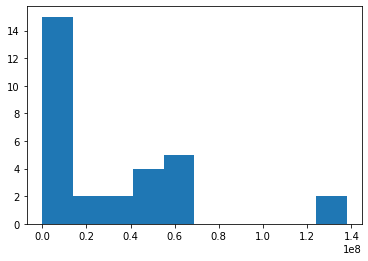

In [76]:
#al menor garantizemos que el restante que no podemos explicar, tengan distribucion normal. 
plt.hist((datos["Salario predicho"]-datos["Salario real"])**2)

In [118]:
datos = pd.read_csv("Datasets/Salary_Data.csv")
datos.head(4)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0


In [126]:
X = pd.DataFrame(datos["YearsExperience"])
Y = pd.DataFrame(datos["Salary"])

In [127]:
regression = LinearRegression()
regression.fit(X,Y)

LinearRegression()

In [146]:
regression.intercept_ #alpha

array([25792.20019867])

In [147]:
regression.coef_ #coeficente 

array([[9449.96232146]])

In [130]:
regression.score(X,Y) #R^2

0.9569566641435086

In [141]:
datos

,YearsExperience,Salario real,Salario predicho
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


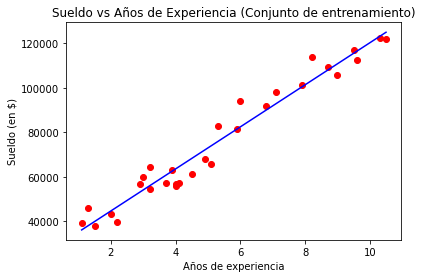

In [142]:
#graficamente 
plt.scatter(X, Y, color = "red")
plt.plot(X,regression.predict(X), color = "blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de entrenamiento)")
plt.xlabel("Años de experiencia")
plt.ylabel("Sueldo (en $)")
plt.show()

# Conclusion: 

La recta de regresion que se ajusta a este conjunto de datos es: 

## y = 25792.20019867 + 9449.96232146 * x
